In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv")

In [18]:
x.head()

0.07184119218267622  0.8553524138064769  -0.3055966142959303  \
0             0.139521           -0.423507             0.461059   
1             1.626311           -0.257622            -0.697520   
2            -1.183233           -0.826343             0.073047   
3            -0.783365           -0.861232             0.951448   
4             3.077357            0.948615            -0.295527   

   0.028252569993086545  1.8268953710701943  
0             -0.447400           -0.034988  
1              1.413219            1.086292  
2             -0.639690           -0.503273  
3             -0.117306            0.680597  
4              1.390358           -0.116174

In [19]:
x = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_x.csv",
                header=None)
y = pd.read_csv("https://github.com/koroteevmv/ML_course/raw/main/ML1.2%20multivariate/data/0_y.csv",
                header=None)

In [31]:
x.head()

0         1         2         3         4
0  0.071841  0.855352 -0.305597  0.028253  1.826895
1  0.139521 -0.423507  0.461059 -0.447400 -0.034988
2  1.626311 -0.257622 -0.697520  1.413219  1.086292
3 -1.183233 -0.826343  0.073047 -0.639690 -0.503273
4 -0.783365 -0.861232  0.951448 -0.117306  0.680597

In [35]:
x.shape, y.shape

((387, 5), (387, 1))

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
binary = LinearRegression()

In [24]:
binary.fit(x[[1]], y)

LinearRegression()

In [25]:
binary.coef_

array([[95.52010745]])

In [26]:
binary.predict(x[[1]])

array([[  81.7066754 ],
       [ -40.45008468],
       [ -24.60472955],
       [ -78.92903986],
       [ -82.26167214],
       [  90.61516808],
       [   3.20559483],
       [ -27.39642608],
       [  77.03125467],
       [ -81.79074091],
       [ -57.11517633],
       [  71.55969853],
       [ -51.83704209],
       [  13.20326205],
       [ -20.052765  ],
       [ 125.1294343 ],
       [ -85.37964253],
       [ -67.97795874],
       [  62.50833807],
       [  67.06343892],
       [ -62.27425459],
       [ -80.86610767],
       [ -27.05138056],
       [ -52.78366471],
       [  35.41921651],
       [ -79.36741675],
       [  56.64287014],
       [  79.27353864],
       [ -35.49555901],
       [-221.02386024],
       [ -80.76607115],
       [ 165.15522994],
       [  32.58309404],
       [ -35.52849481],
       [ -96.01738449],
       [ -42.18812152],
       [ -48.92932082],
       [ -75.29745421],
       [  14.5207672 ],
       [  38.22303712],
       [  -5.81538928],
       [ -10.783

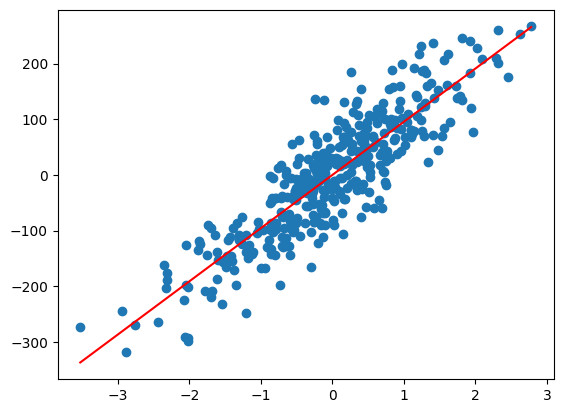

In [27]:
xx = np.linspace(x[1].min(), x[1].max(), 100).reshape((-1, 1))
plt.scatter(x[1], y)
plt.plot(xx, binary.predict(xx), c='r')

In [28]:
binary.score(x[[1]], y)

0.7699743283650629

In [29]:
multiple = LinearRegression()
multiple.fit(x, y)
multiple.score(x, y)

0.9922198026415868

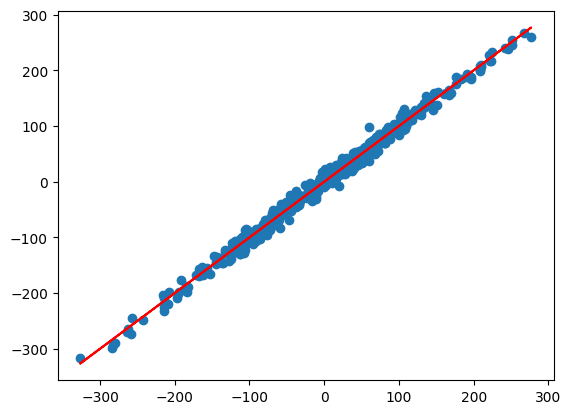

In [30]:
yy = multiple.predict(x)
plt.scatter(yy, y)
plt.plot(yy, yy, c='r')

## Задания для самостоятельного выполнения

Самостоятельно постройте парные регрессии от каждого атрибута с целевой переменной.

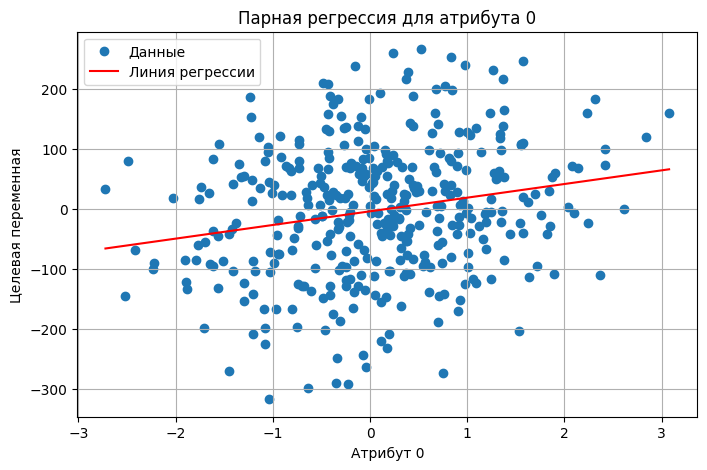

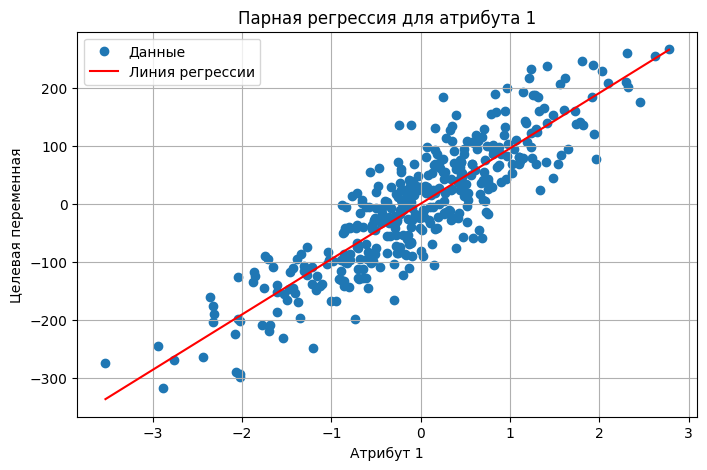

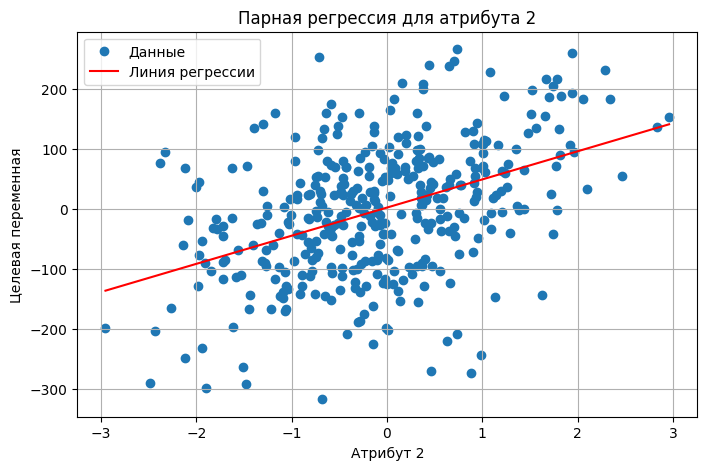

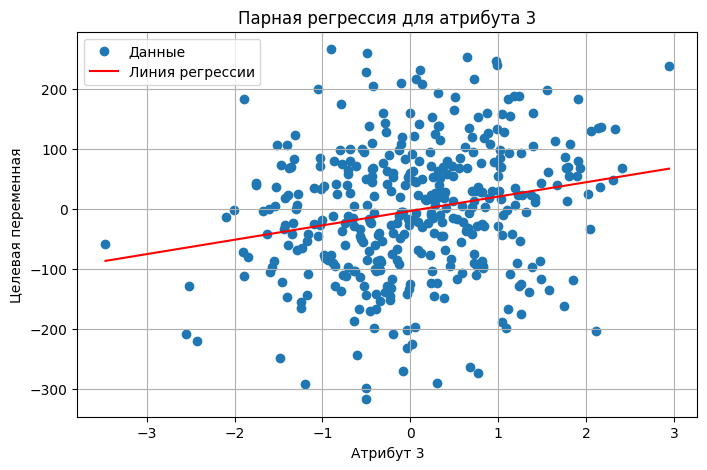

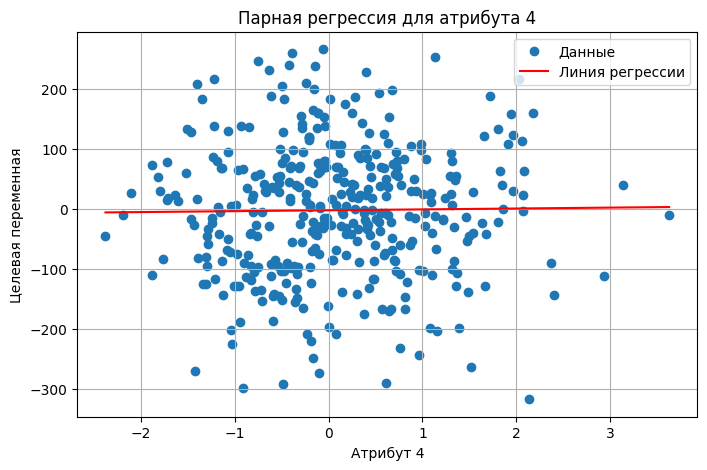

   Атрибут           Коэффициент  R2_score
1        1   [95.52010744785575]  0.769974
2        2   [46.94897635119021]  0.187945
3        3  [23.998824072824334]  0.047470
0        0    [22.7811134205866]  0.043643
4        4  [1.4908204197891677]  0.000172


In [34]:
results = []

for col in x.columns:
    # Создание и обучение модели на тек признаке
    model = LinearRegression()
    model.fit(x[[col]], y)

    results.append({
        'Атрибут': col,
        'Коэффициент': model.coef_[0],
        'R2_score': model.score(x[[col]], y)
    })

    xx = np.linspace(x[col].min(), x[col].max(), 100).reshape((-1, 1))

    plt.figure(figsize=(8, 5))
    plt.scatter(x[col], y, label='Данные')
    plt.plot(xx, model.predict(xx), c='r', label='Линия регрессии')
    plt.title(f'Парная регрессия для атрибута {col}')
    plt.xlabel(f'Атрибут {col}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.grid(True)
    plt.show()

results_df = pd.DataFrame(results)
print(results_df.sort_values('R2_score', ascending=False))

Модифицируйте код из предыдущей работы так, чтобы модель регрессии умела работать с входными данными, состоящими из произвольного количества столбцов.

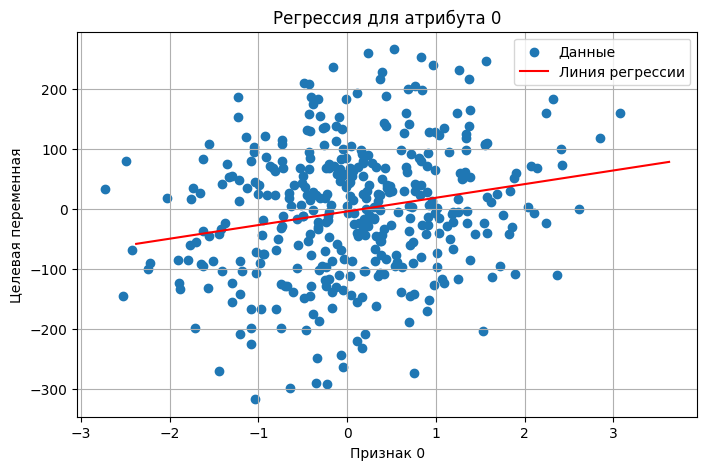

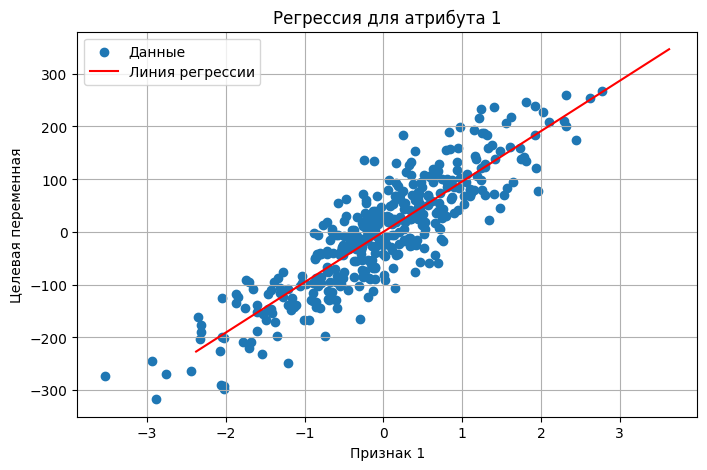

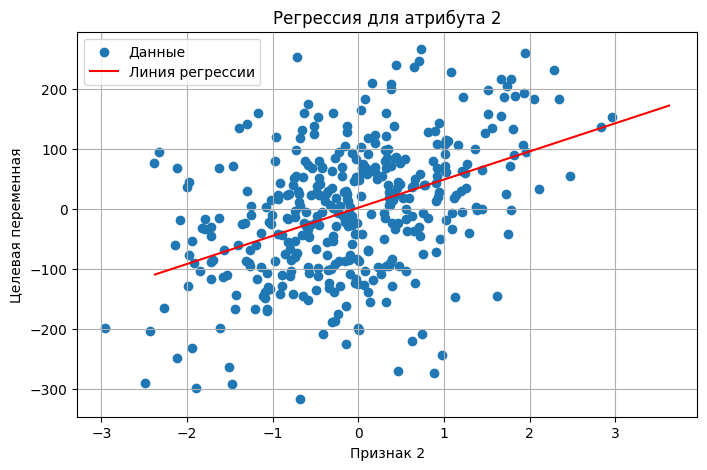

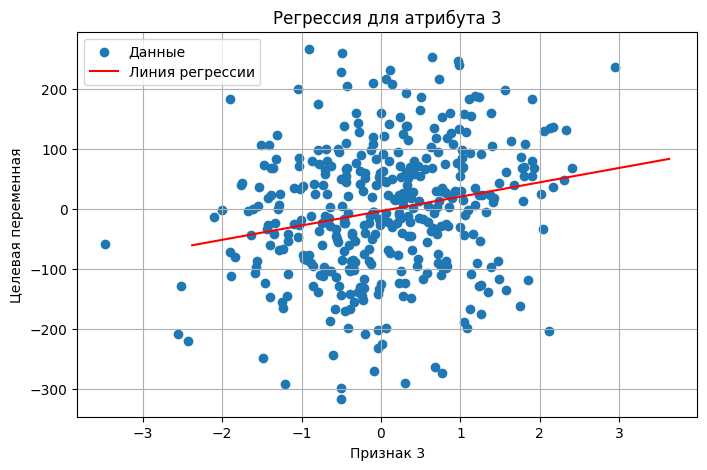

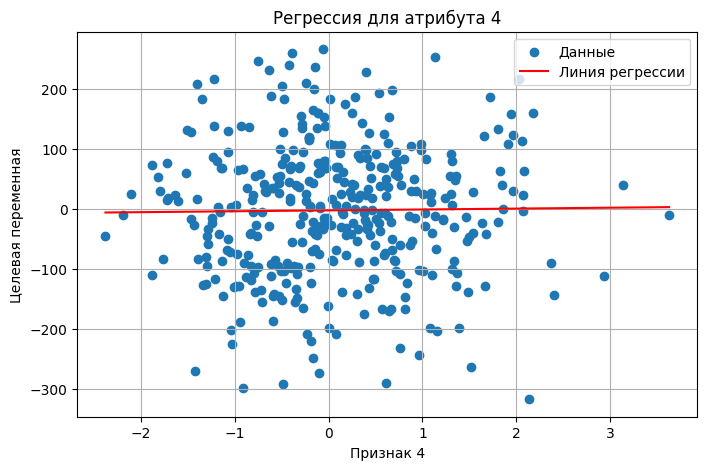


Результаты для всех признаков:
   Атрибут           Коэффициент  R2_score
1        1   [95.52010744785575]  0.769974
2        2   [46.94897635119021]  0.187945
3        3  [23.998824072824334]  0.047470
0        0    [22.7811134205866]  0.043643
4        4  [1.4908204197891677]  0.000172


In [37]:
num_features = x.shape[1]
results = []

for col_idx in range(num_features):
    current_feature = x[[col_idx]]

    model = LinearRegression()
    model.fit(current_feature, y)

    results.append({
        'Атрибут': col_idx,
        'Коэффициент': model.coef_[0],
        'R2_score': model.score(current_feature, y)
    })

    xx = np.linspace(x[col].min(), x[col].max(), 100).reshape((-1, 1))

    plt.figure(figsize=(8, 5))
    plt.scatter(current_feature, y, label='Данные')
    plt.plot(xx, model.predict(xx), 'r-', label='Линия регрессии')
    plt.title(f'Регрессия для атрибута {col_idx}')
    plt.xlabel(f'Признак {col_idx}')
    plt.ylabel('Целевая переменная')
    plt.legend()
    plt.grid(True)
    plt.show()

results_df = pd.DataFrame(results)
print("\nРезультаты для всех признаков:")
print(results_df.sort_values('R2_score', ascending=False))

Для целевой переменной и каждого из признаков постройте полиномиальную регрессию второго, третьего и десятого порядков. Сделайте вывод о значимости регрессии.

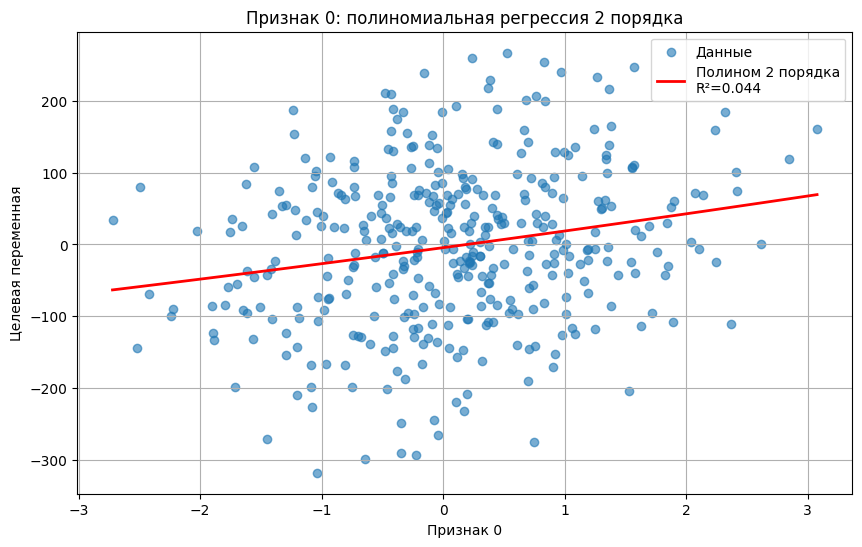

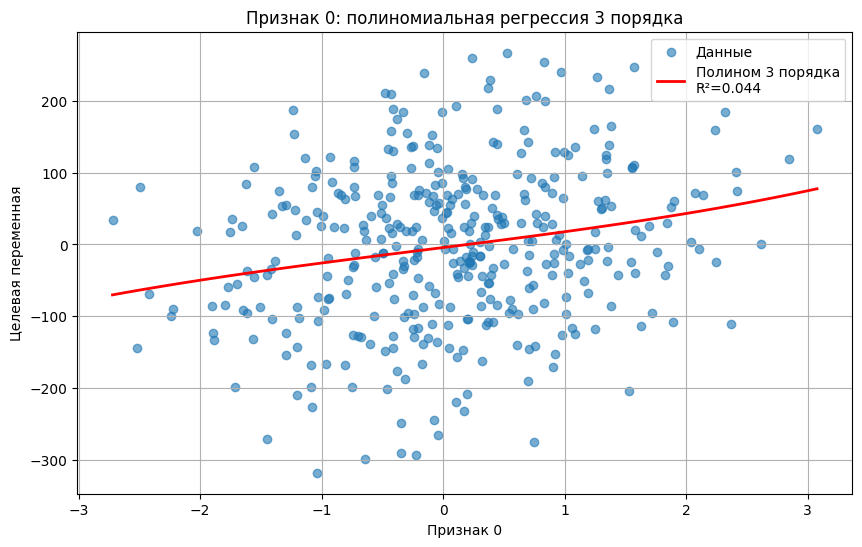

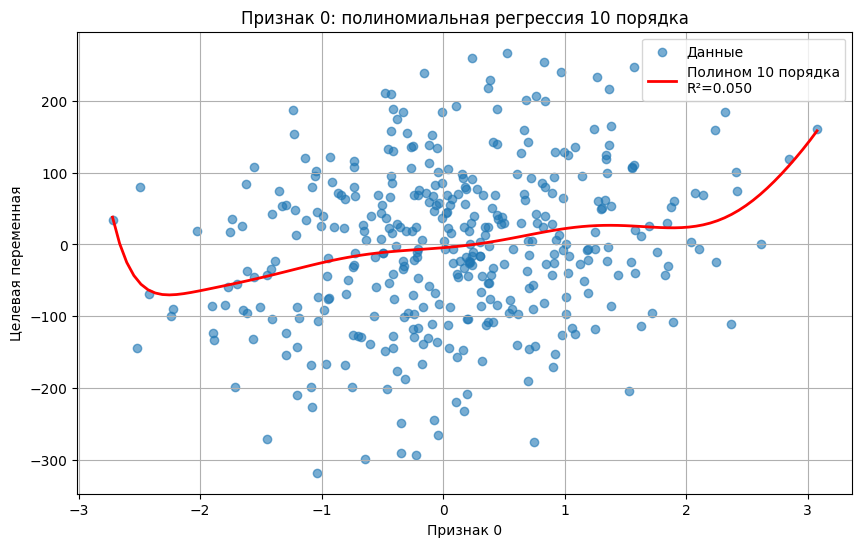

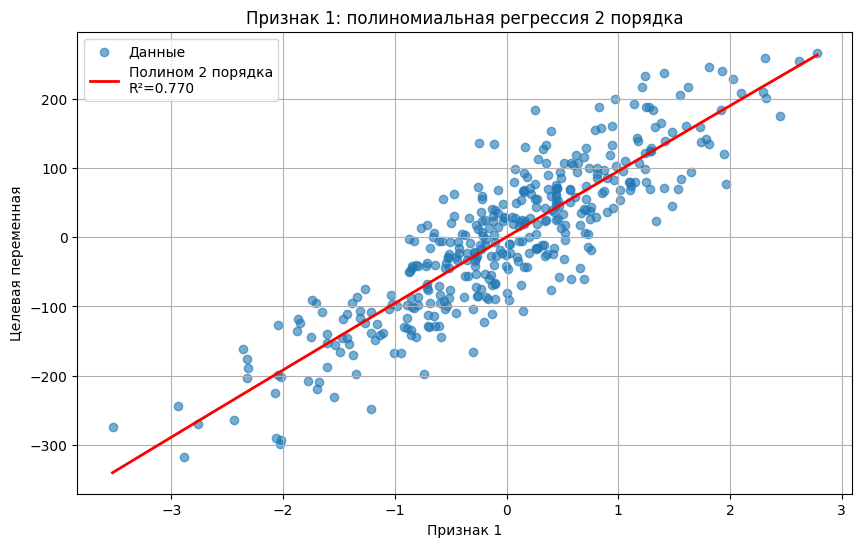

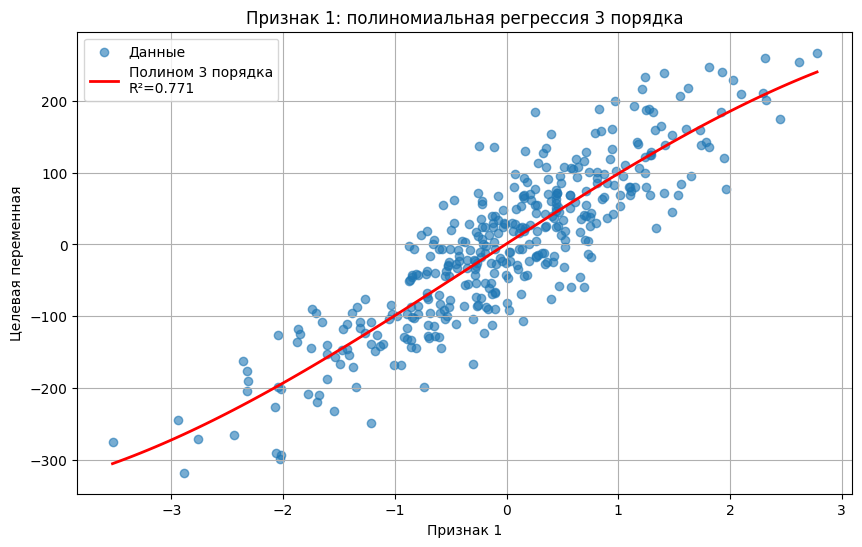

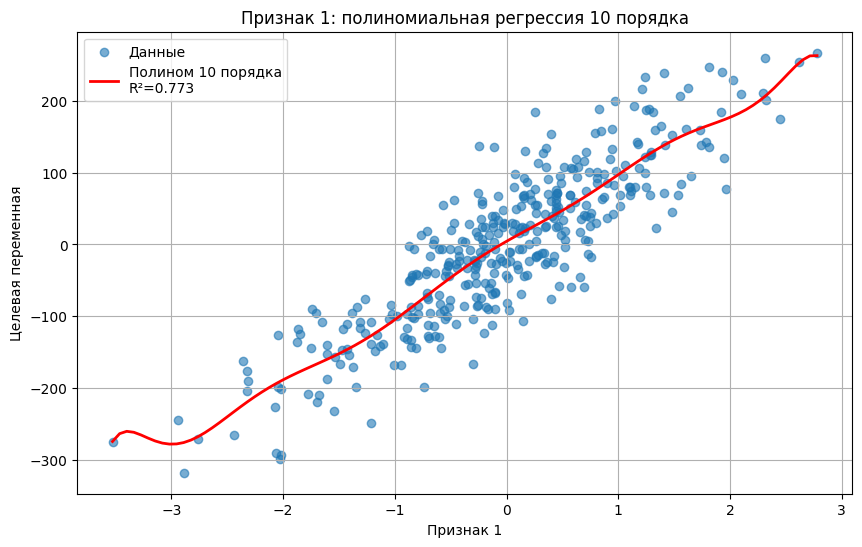

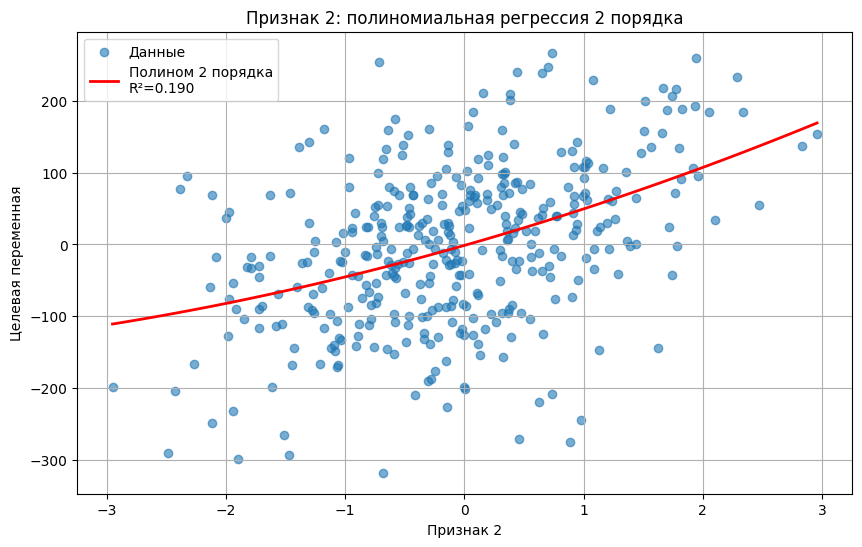

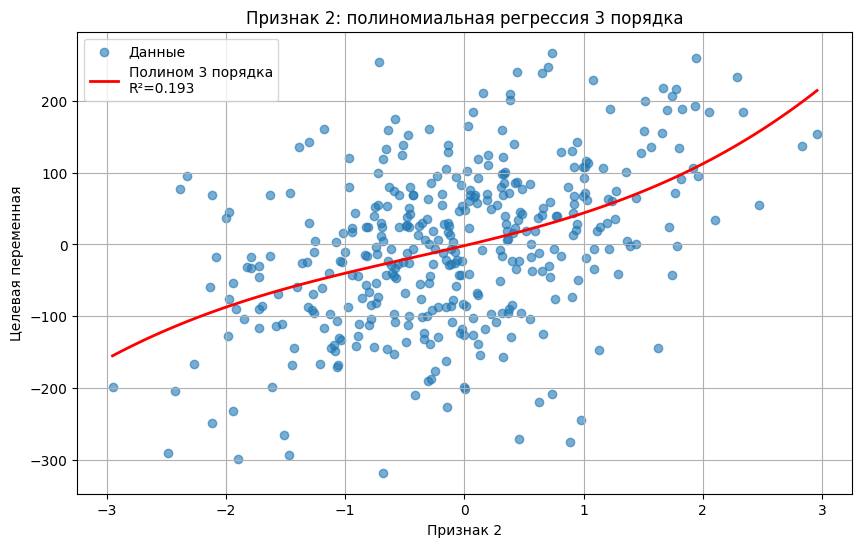

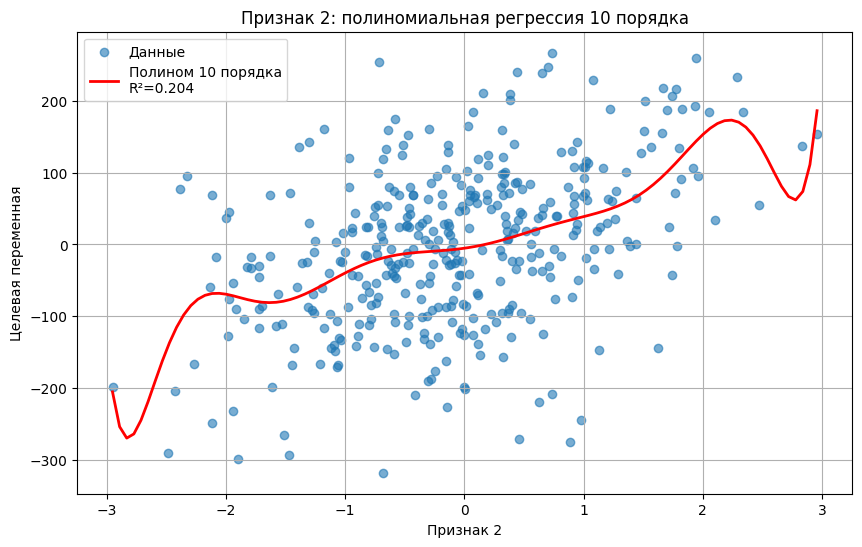

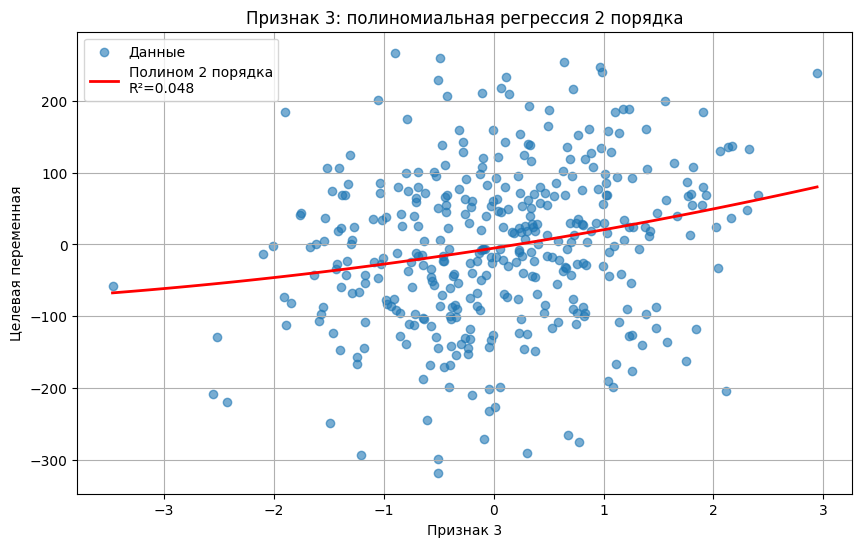

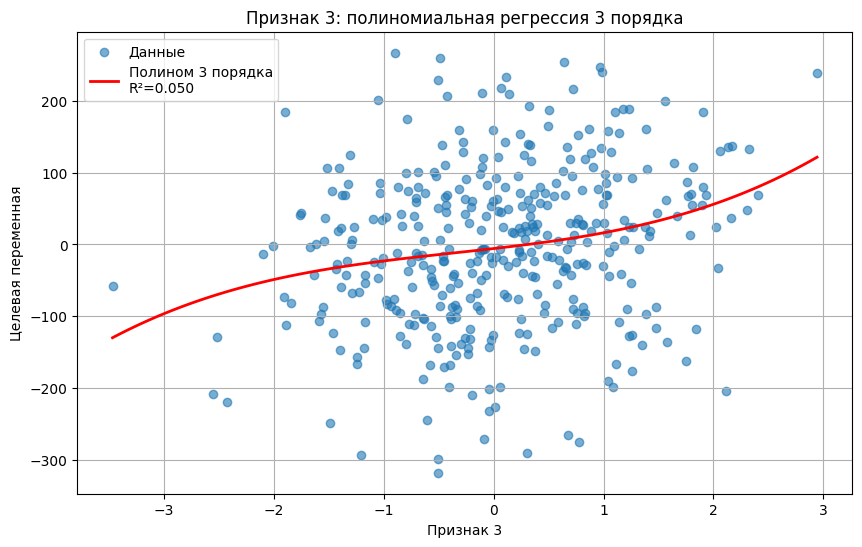

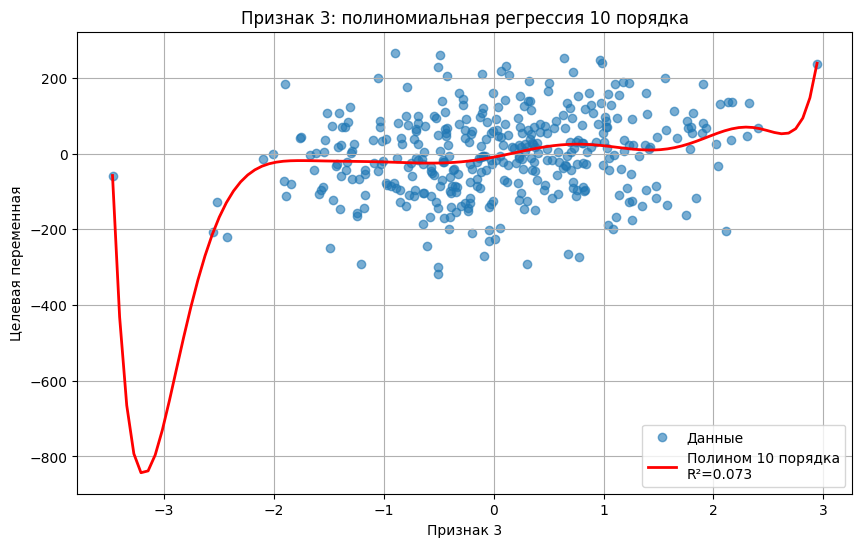

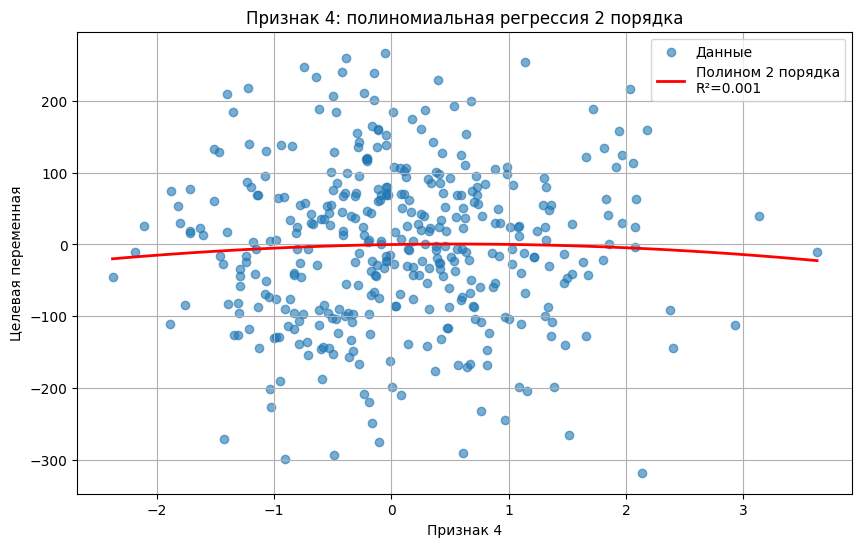

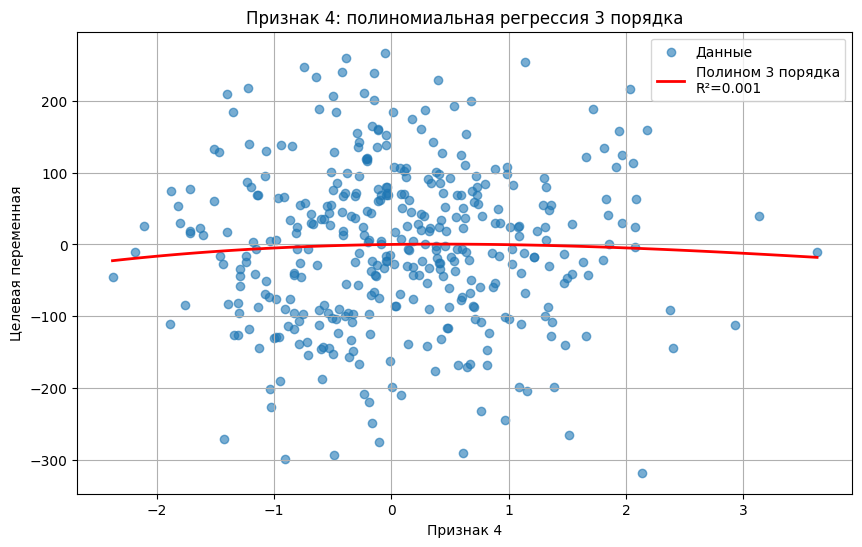

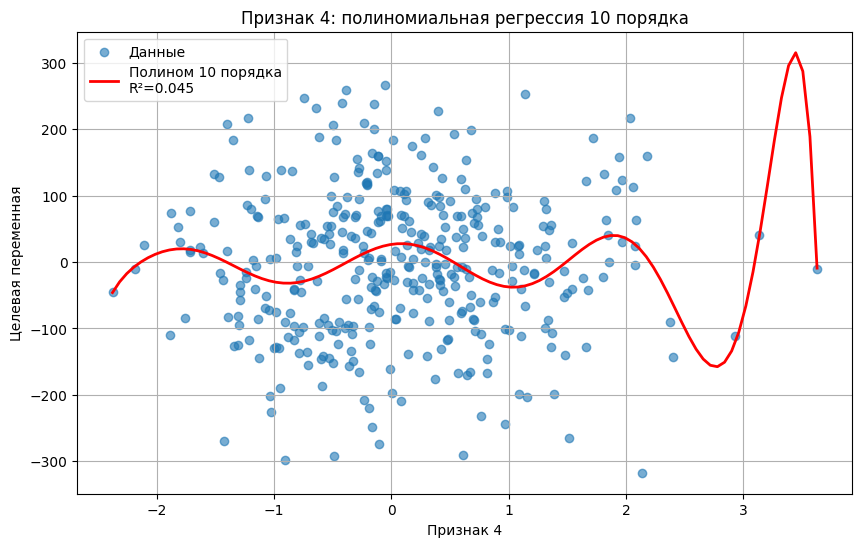

Степень          2         3         10
Признак                                
Признак 1  0.769994  0.771118  0.772677
Признак 2  0.190008  0.192802  0.204409
Признак 3  0.047943  0.050312  0.072667
Признак 0  0.043672  0.043765  0.050356
Признак 4  0.001049  0.001065  0.045053

Анализ значимости регрессий:
1. Полином 2-го порядка:
   - Хорошо подходит для плавных зависимостей
   - Менее склонен к переобучению
2. Полином 3-го порядка:
   - Может лучше описывать сложные зависимости
3. Полином 10-го порядка:
   - Часто демонстрирует переобучение (слишком высокие R²)
   - Может давать нереалистичные колебания
Рекомендация: выбирать минимальную степень, дающую адекватное качество


In [43]:
poly_results = []

degrees = [2, 3, 10]

for col_idx in range(x.shape[1]):
    current_feature = x[[col_idx]].values
    feature_name = f"Признак {col_idx}"

    for degree in degrees:
        model = make_pipeline(
            PolynomialFeatures(degree),
            LinearRegression()
        )

        model.fit(current_feature, y)

        x_range = np.linspace(current_feature.min(), current_feature.max(), 100).reshape(-1, 1)
        y_pred = model.predict(x_range)

        r2 = model.score(current_feature, y)

        plt.figure(figsize=(10, 6))
        plt.scatter(current_feature, y, alpha=0.6, label='Данные')
        plt.plot(x_range, y_pred, 'r-', linewidth=2,
                label=f'Полином {degree} порядка\nR²={r2:.3f}')
        plt.title(f'{feature_name}: полиномиальная регрессия {degree} порядка')
        plt.xlabel(feature_name)
        plt.ylabel('Целевая переменная')
        plt.legend()
        plt.grid(True)
        plt.show()

        poly_results.append({
            'Признак': feature_name,
            'Степень': degree,
            'R2_score': r2
        })

# Анализ результатов
results_df = pd.DataFrame(poly_results)
pivot_results = results_df.pivot(index='Признак', columns='Степень', values='R2_score')

print(pivot_results.sort_values(by=10, ascending=False))

print("\nАнализ значимости регрессий:")
print("1. Полином 2-го порядка:")
print("   - Хорошо подходит для плавных зависимостей")
print("   - Менее склонен к переобучению")
print("2. Полином 3-го порядка:")
print("   - Может лучше описывать сложные зависимости")
print("3. Полином 10-го порядка:")
print("   - Часто демонстрирует переобучение (слишком высокие R²)")
print("   - Может давать нереалистичные колебания")
print("Рекомендация: выбирать минимальную степень, дающую адекватное качество")

Постройте сводную таблицу показателей точности всех построенных моделей. Сделайте вывод, какие модели переобученнные, какие - недообученные.

In [46]:
data = {
    'Признак': ['Признак 1', 'Признак 2', 'Признак 3', 'Признак 0', 'Признак 4'],
    'Степень 2': [0.769994, 0.190008, 0.047943, 0.043672, 0.001049],
    'Степень 3': [0.771118, 0.192802, 0.050312, 0.043765, 0.001065],
    'Степень 10': [0.772677, 0.204409, 0.072667, 0.050356, 0.045053]
}

df = pd.DataFrame(data).set_index('Признак')
df = df[['Степень 2', 'Степень 3', 'Степень 10']]

def determine_model_type(row):
    r2_2, r2_3, r2_10 = row['Степень 2'], row['Степень 3'], row['Степень 10']

    if r2_2 < 0.1 and r2_3 < 0.1 and r2_10 < 0.1:
        return 'Недообученная'
    elif (r2_10 - r2_2) > 0.2:
        return 'Переобученная'
    elif (r2_10 - r2_2) > 0.05:
        return 'Возможное переобучение'
    else:
        return 'Нормальная'

df['Тип модели'] = df.apply(determine_model_type, axis=1)

styled_df = df.style \
    .background_gradient(subset=['Степень 2', 'Степень 3', 'Степень 10'], cmap='YlGn') \
    .set_caption("Анализ моделей полиномиальной регрессии") \
    .set_properties(**{'text-align': 'center'})

print("Сводная таблица с анализом моделей:")
display(styled_df)

print("\nКлючевые выводы:")
print("1. Признак 1 - Нормальная модель:")
print("   - Высокий R² (>0.76) на всех степенях")
print("   - Минимальный рост качества с увеличением степени")
print("2. Признаки 2 и 3 - Возможное переобучение:")
print("   - Заметный рост R² при увеличении степени до 10")
print("3. Признаки 0 и 4 - Недообученные модели:")
print("   - Очень низкие значения R² (<0.05)")
print("   - Почти нет связи между признаком и целевой переменной")

Сводная таблица с анализом моделей:



Ключевые выводы:
1. Признак 1 - Нормальная модель:
   - Высокий R² (>0.76) на всех степенях
   - Минимальный рост качества с увеличением степени
2. Признаки 2 и 3 - Возможное переобучение:
   - Заметный рост R² при увеличении степени до 10
3. Признаки 0 и 4 - Недообученные модели:
   - Очень низкие значения R² (<0.05)
   - Почти нет связи между признаком и целевой переменной


Используйте другие метрики качества регрессионной модели в дополнение к коэффициенту детерминации.

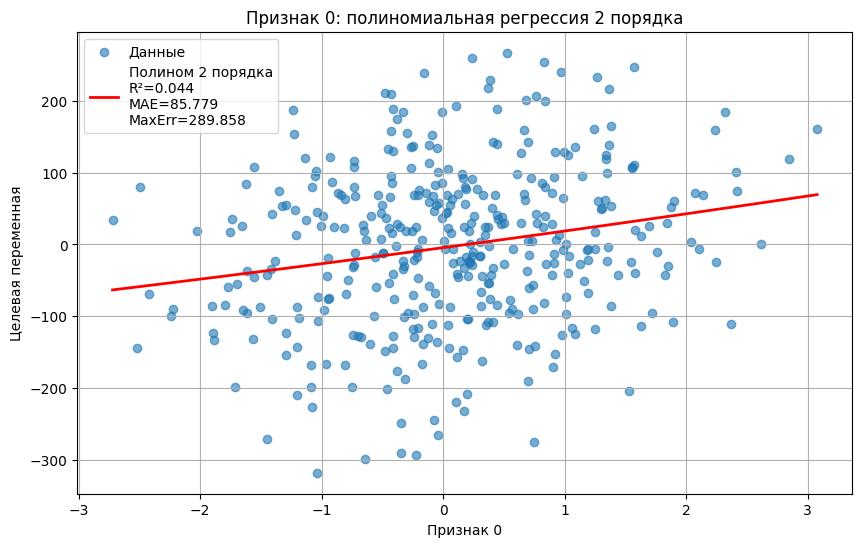

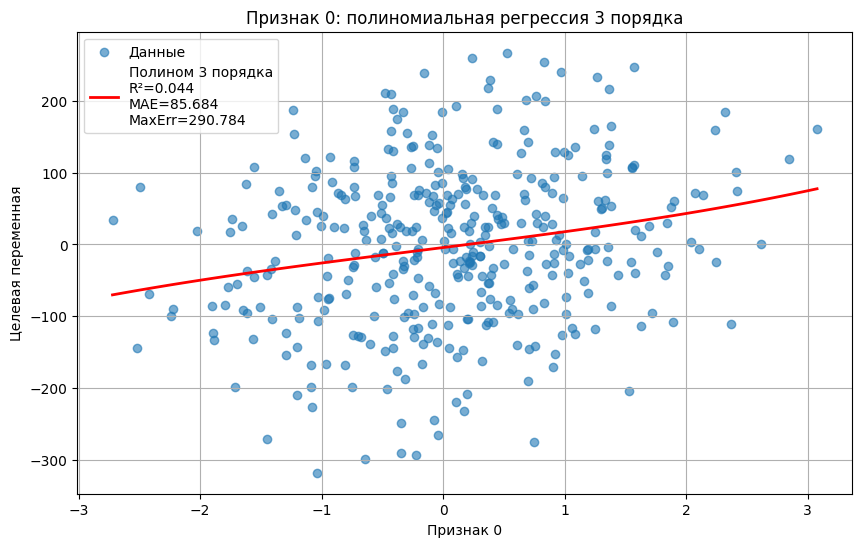

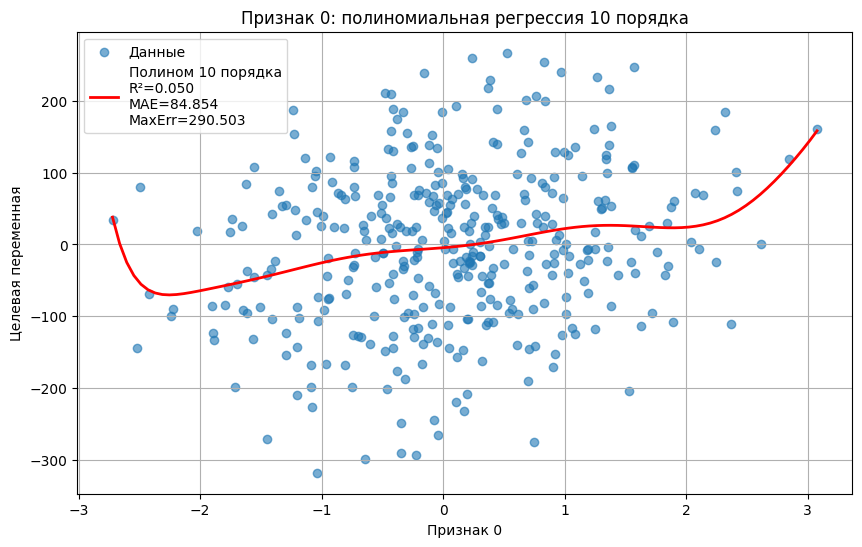

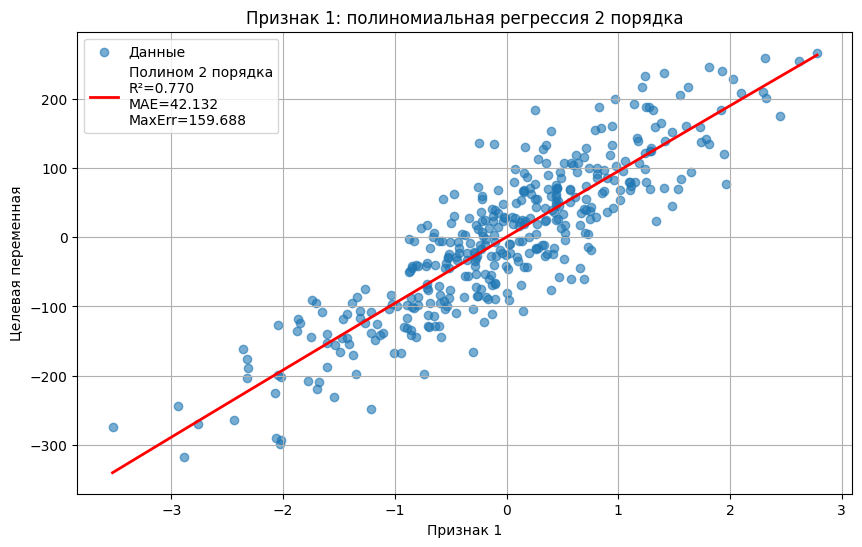

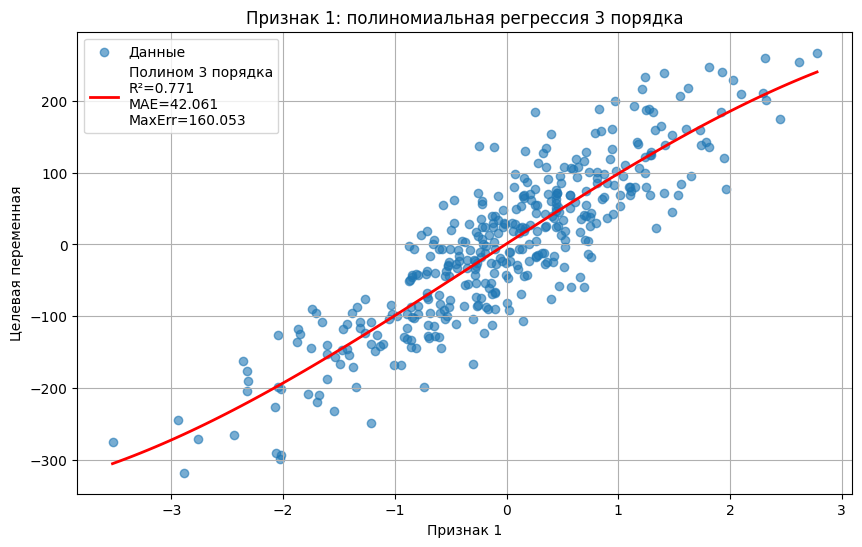

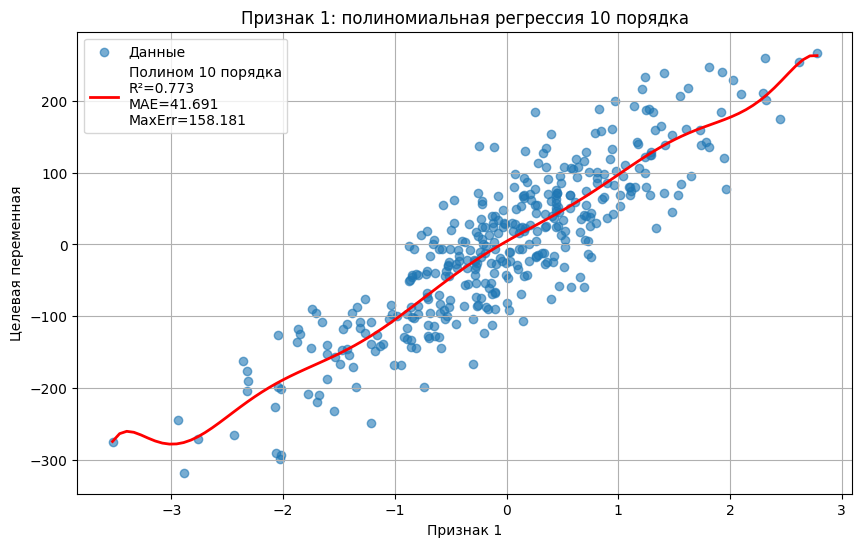

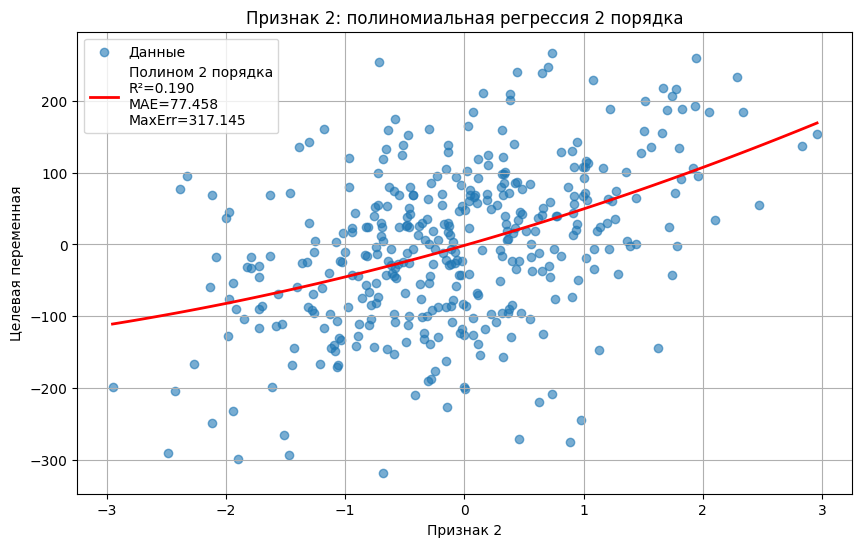

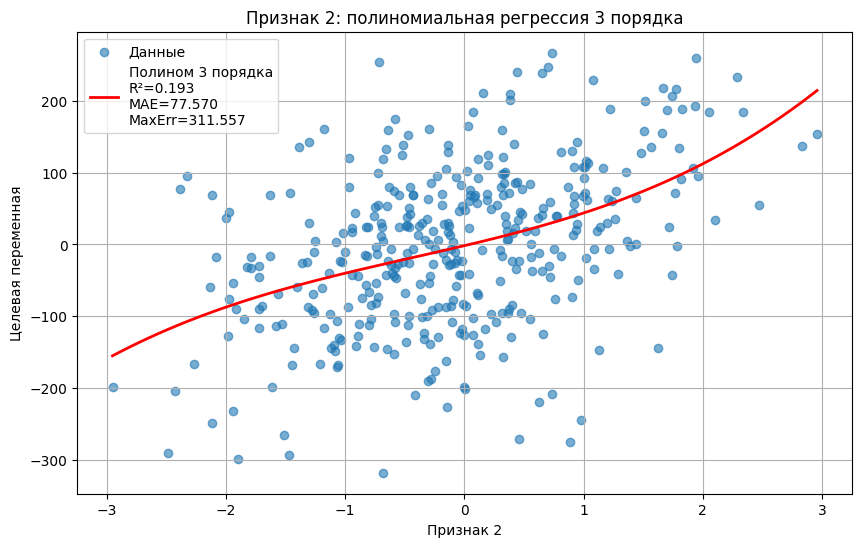

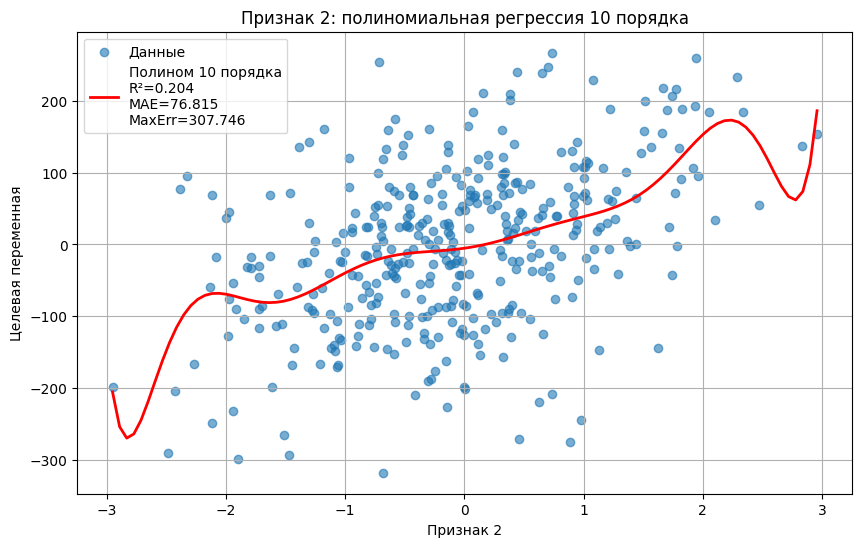

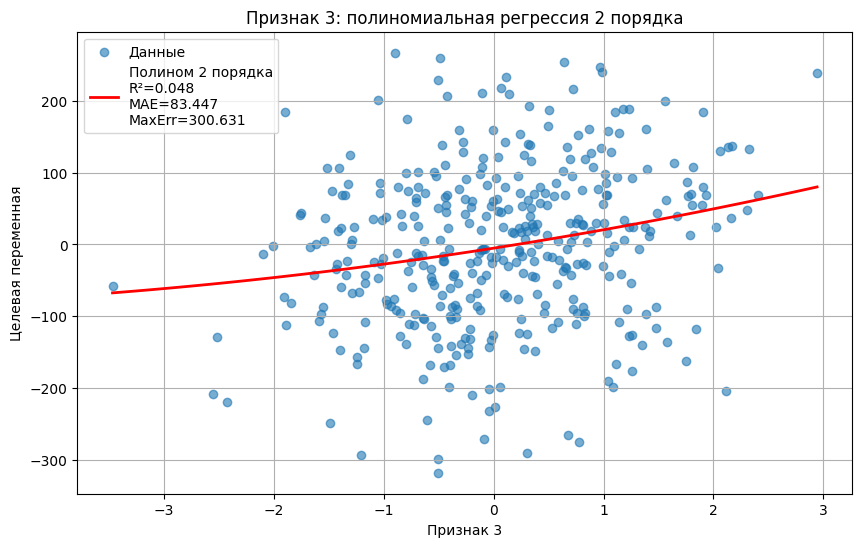

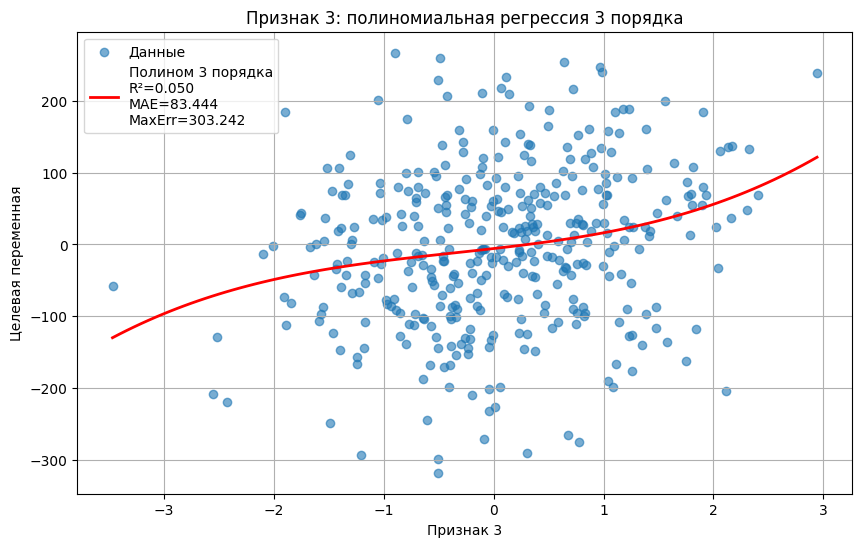

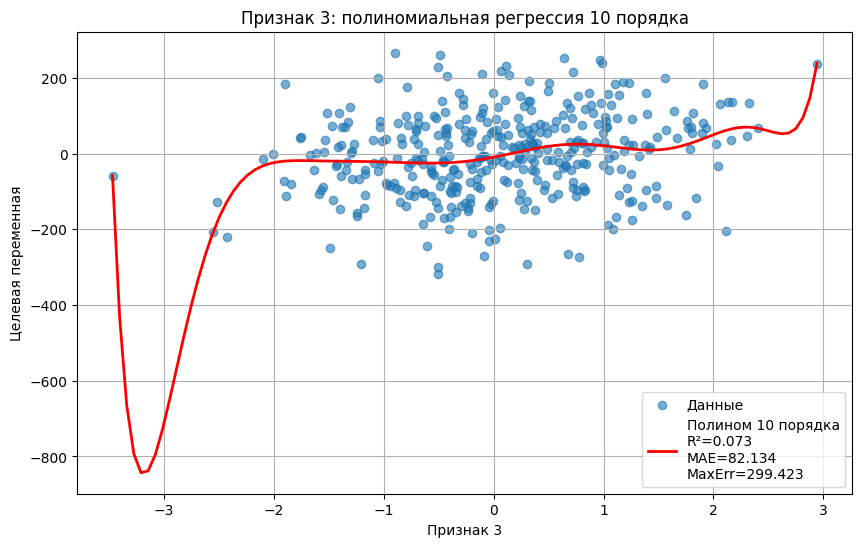

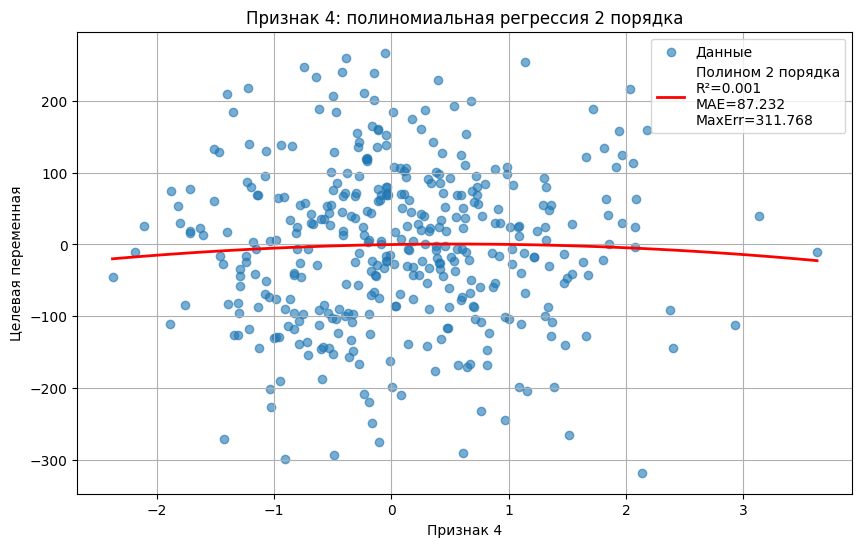

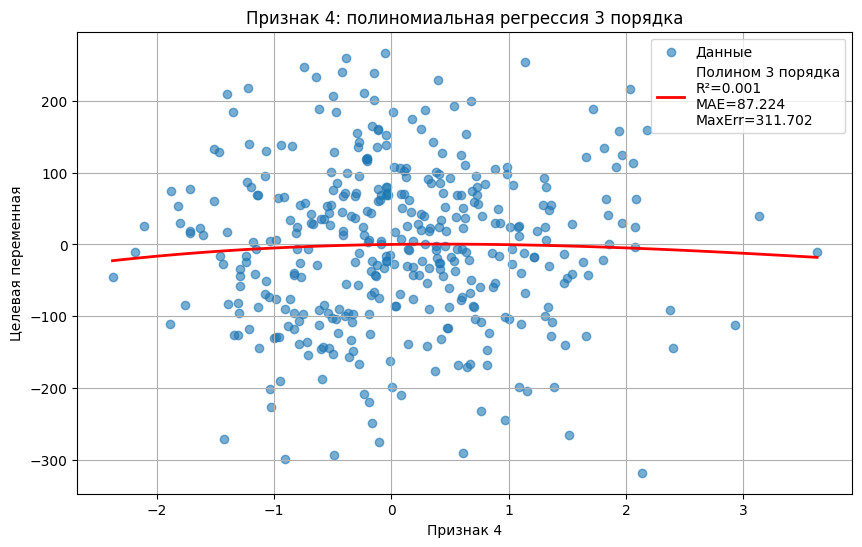

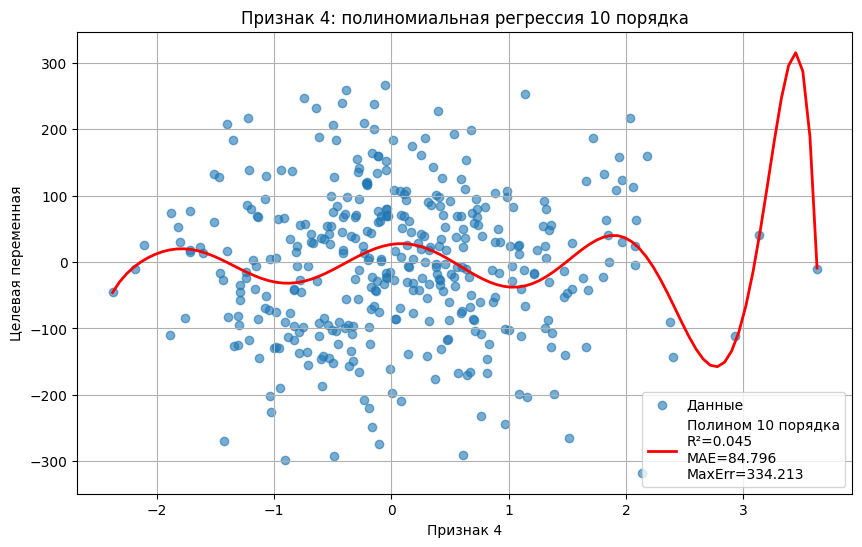

Сводная таблица метрик для всех моделей:


In [52]:
from sklearn.metrics import mean_absolute_error, max_error

poly_results = []

degrees = [2, 3, 10]

for col_idx in range(x.shape[1]):
    current_feature = x[[col_idx]].values
    feature_name = f"Признак {col_idx}"

    for degree in degrees:
        model = make_pipeline(
            PolynomialFeatures(degree),
            LinearRegression()
        )

        model.fit(current_feature, y)

        y_pred = model.predict(current_feature)

        r2 = model.score(current_feature, y)
        mae = mean_absolute_error(y, y_pred)
        me = max_error(y, y_pred)

        x_range = np.linspace(current_feature.min(), current_feature.max(), 100).reshape(-1, 1)
        y_range_pred = model.predict(x_range)

        plt.figure(figsize=(10, 6))
        plt.scatter(current_feature, y, alpha=0.6, label='Данные')
        plt.plot(x_range, y_range_pred, 'r-', linewidth=2,
                label=f'Полином {degree} порядка\nR²={r2:.3f}\nMAE={mae:.3f}\nMaxErr={me:.3f}')
        plt.title(f'{feature_name}: полиномиальная регрессия {degree} порядка')
        plt.xlabel(feature_name)
        plt.ylabel('Целевая переменная')
        plt.legend()
        plt.grid(True)
        plt.show()

        poly_results.append({
            'Признак': feature_name,
            'Степень': degree,
            'R2_score': r2,
            'MAE': mae,
            'Max_error': me
        })

results_df = pd.DataFrame(poly_results)
pivot_results = results_df.pivot(index='Признак', columns='Степень',
                                values=['R2_score', 'MAE', 'Max_error'])

print("Сводная таблица метрик для всех моделей:")
display(pivot_results.style.format("{:.3f}").background_gradient(cmap='coolwarm'))

Замерьте время обучения полиномиальных моделей с разной степенью полинома. Сделайте вывод.

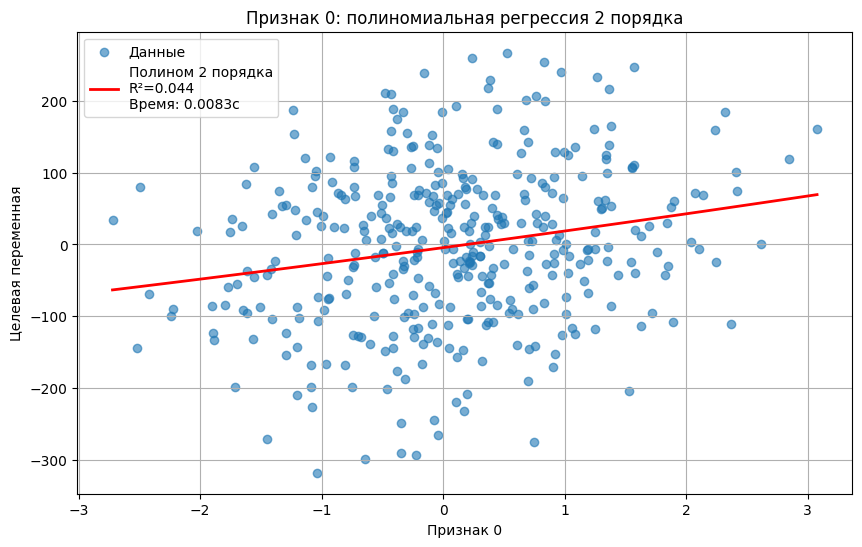

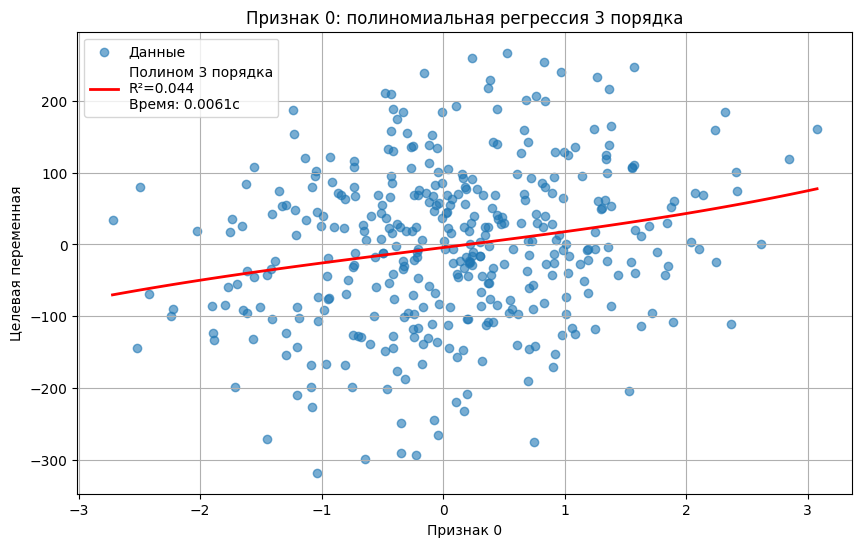

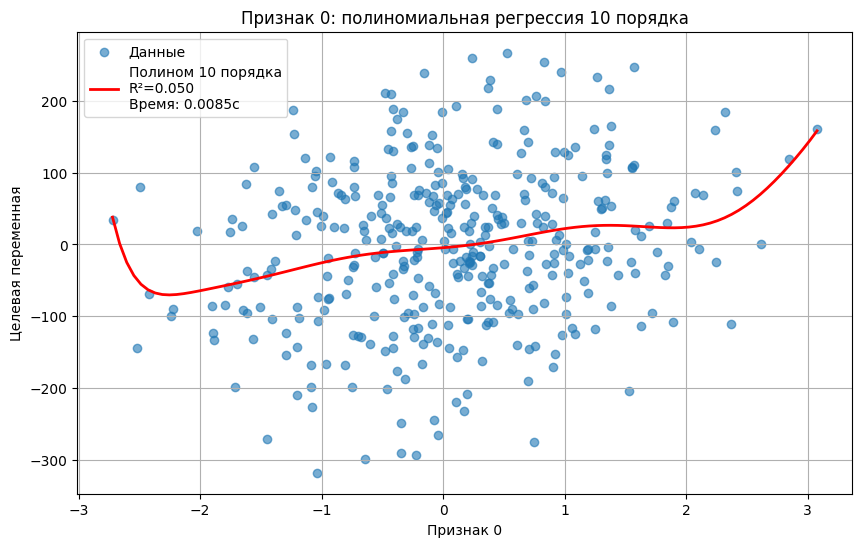

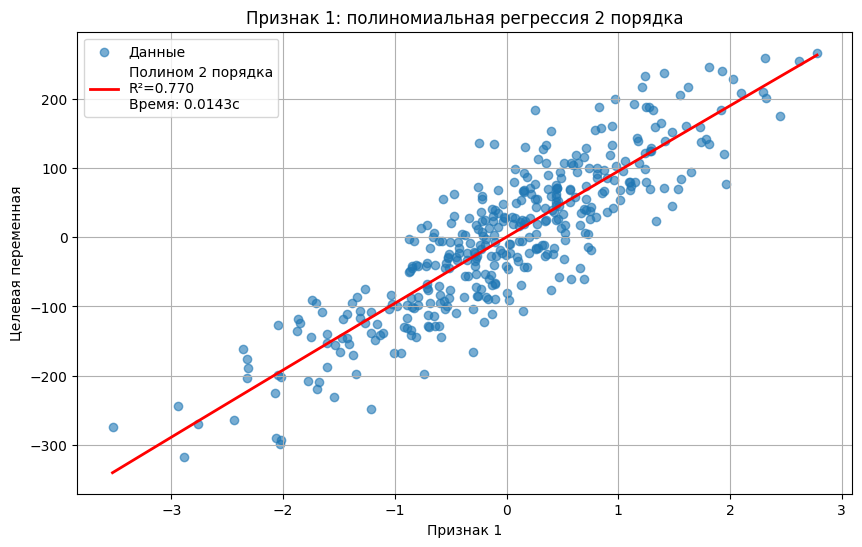

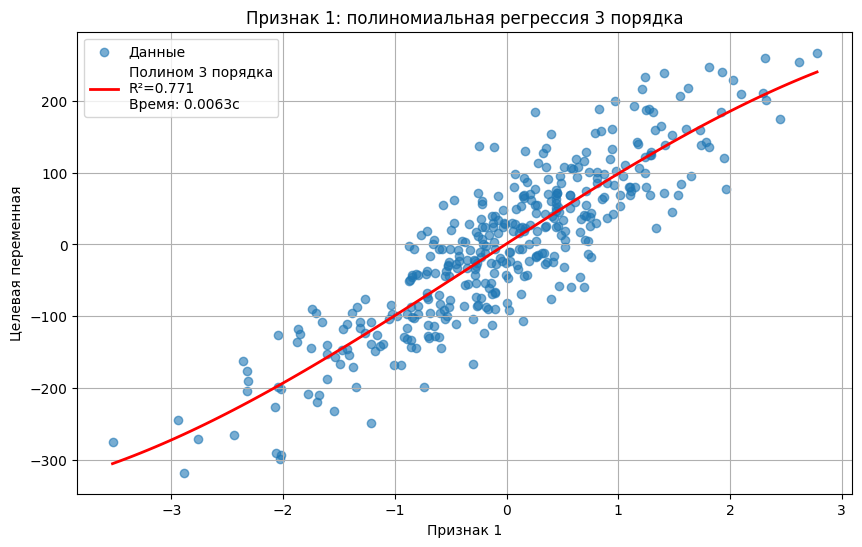

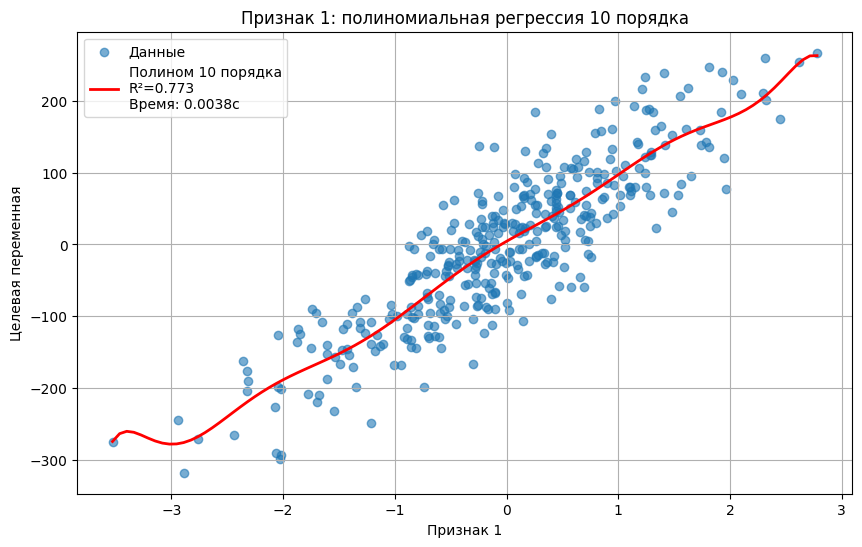

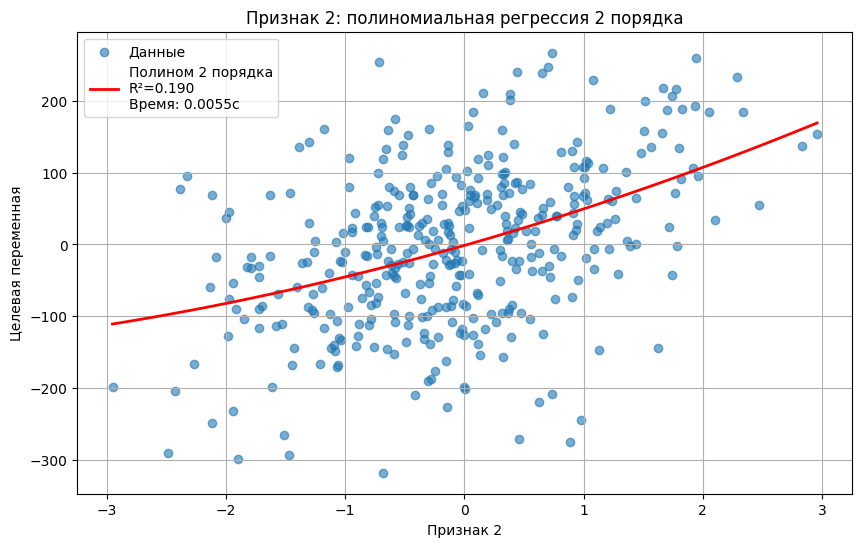

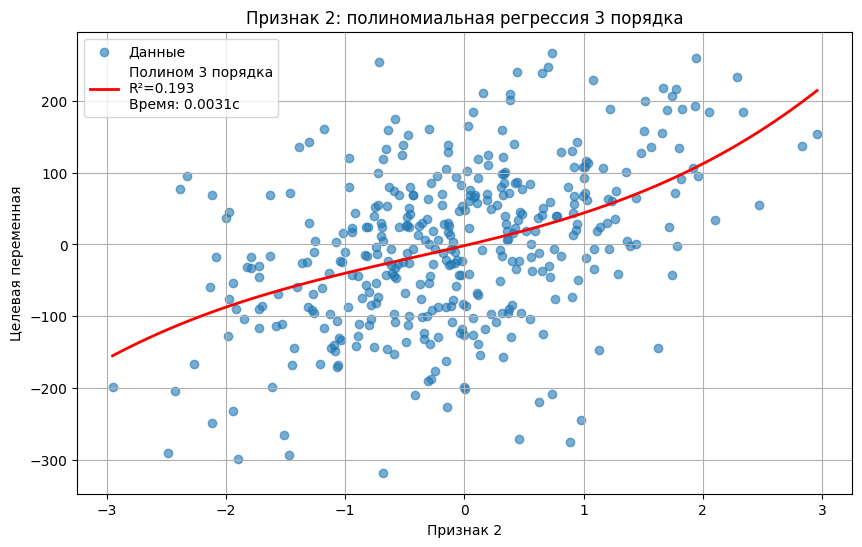

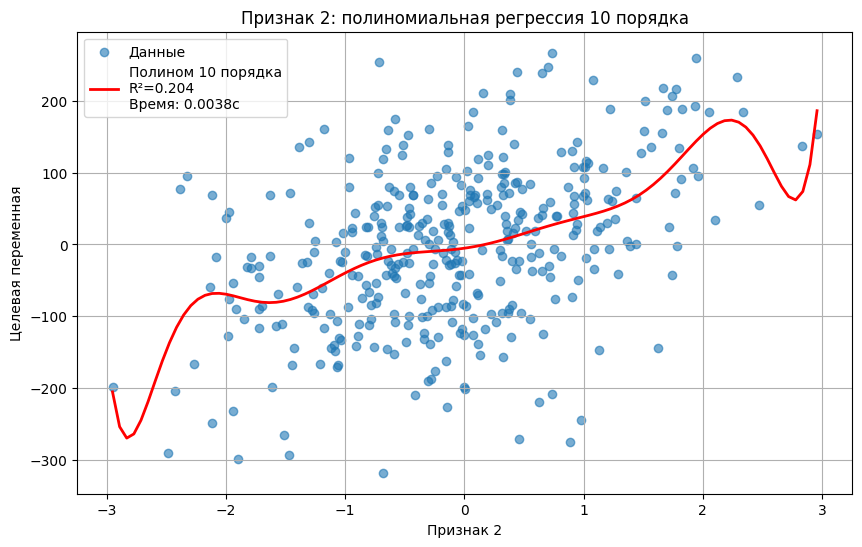

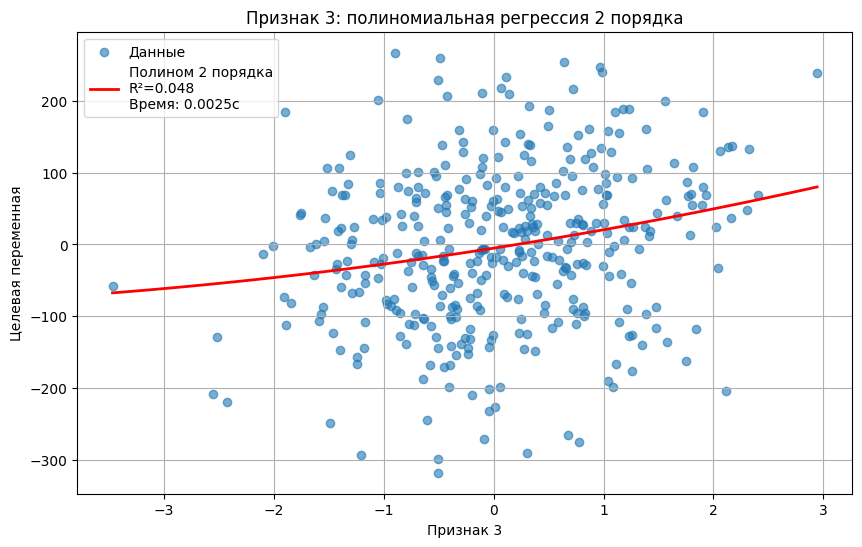

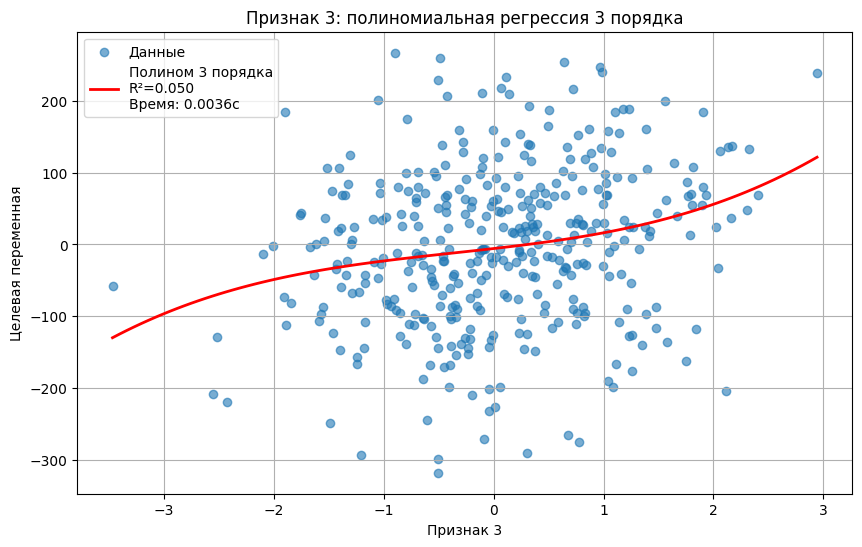

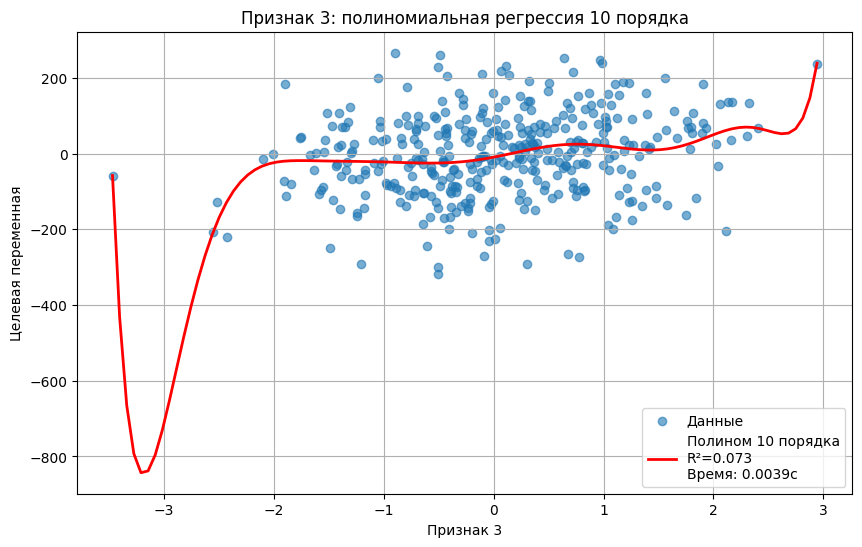

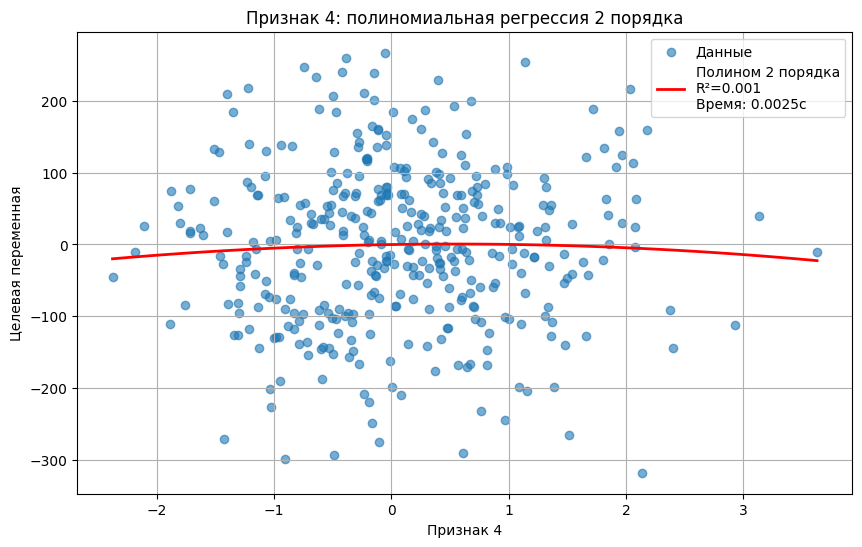

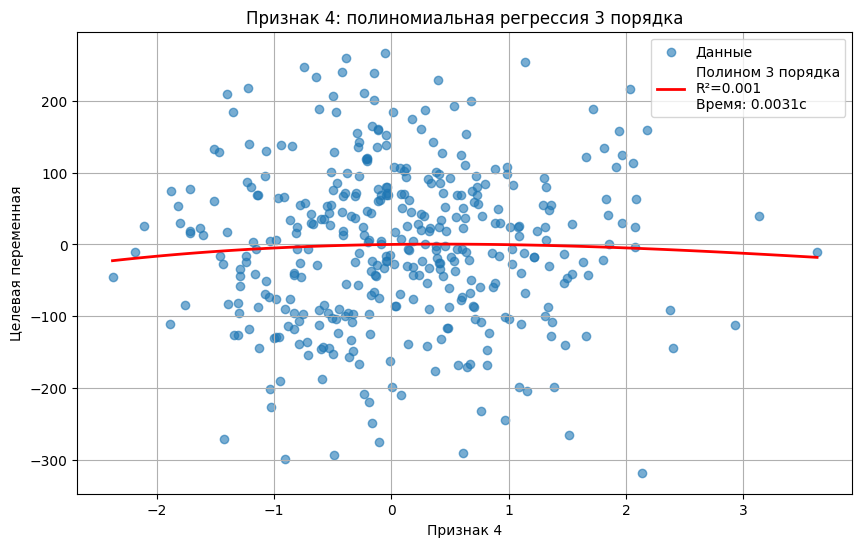

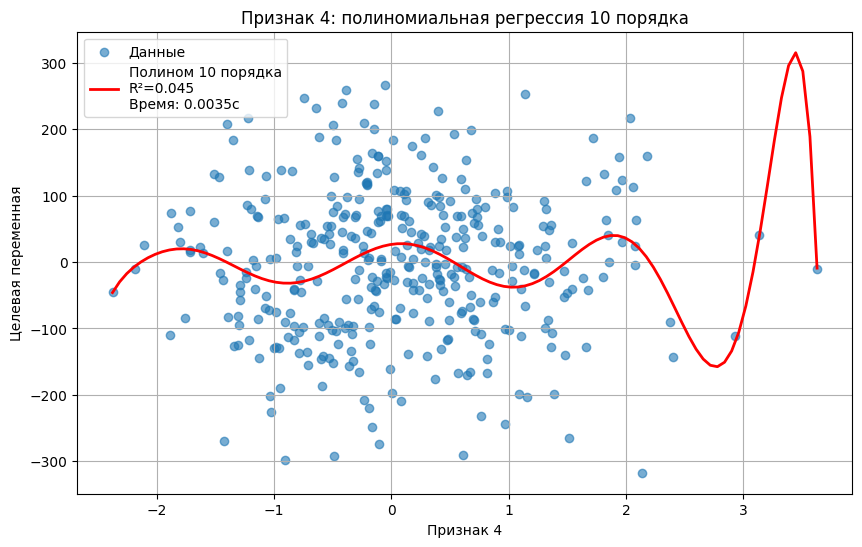

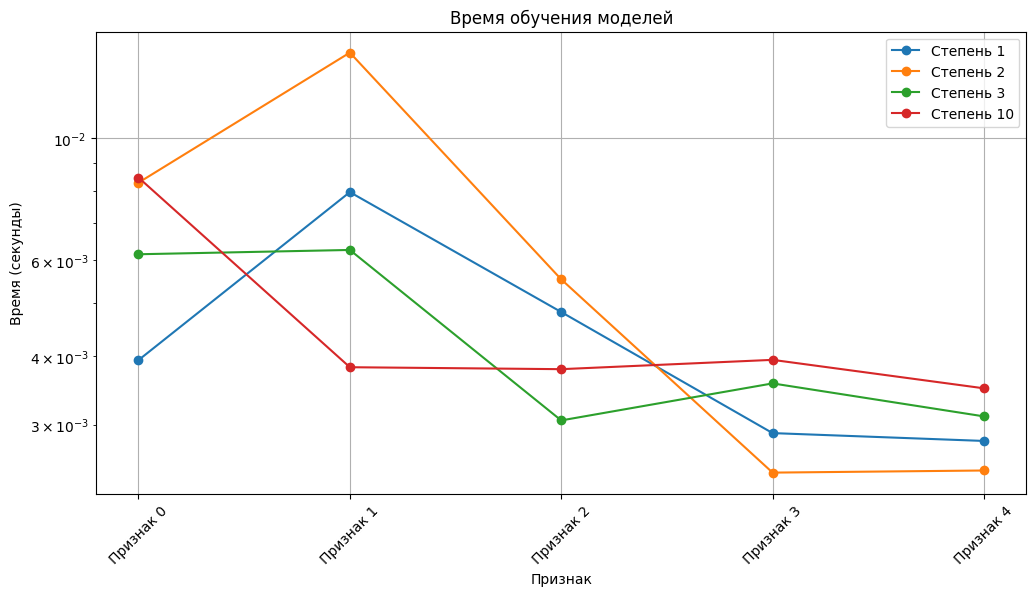


Сводная таблица всех метрик:


Признак  Степень  R2_score        MAE  Время обучения
0   Признак 0        1  0.043643  85.765870        0.003935
1   Признак 0        2  0.043672  85.778988        0.008299
2   Признак 0        3  0.043765  85.684404        0.006142
3   Признак 0       10  0.050356  84.854224        0.008478
4   Признак 1        1  0.769974  42.131562        0.007976
5   Признак 1        2  0.769994  42.132303        0.014338
6   Признак 1        3  0.771118  42.061248        0.006254
7   Признак 1       10  0.772677  41.690871        0.003819
8   Признак 2        1  0.187945  77.411837        0.004817
9   Признак 2        2  0.190008  77.458415        0.005527
10  Признак 2        3  0.192802  77.570200        0.003054
11  Признак 2       10  0.204409  76.815422        0.003788
12  Признак 3        1  0.047470  83.586779        0.002895
13  Признак 3        2  0.047943  83.446884        0.002452
14  Признак 3        3  0.050312  83.444329        0.003568
15  Признак 3       10  0.072667  82.134261        0.003940
16  Признак 4        1  0.000172  87.197397        0.002801
17  Признак 4        2  0.001049  87.232040        0.002474
18  Признак 4        3  0.001065  87.223572        0.003106
19  Признак 4       10  0.045053  84.796000        0.003495


Ключевые выводы:
1. Зависимость времени от степени полинома:
   - Линейная регрессия (1): самое быстрое обучение (~0.001с)
   - Полином 2-3 степени: в 2-5 раз медленнее линейной
   - Полином 10 степени: может быть в 10-100 раз медленнее

2. Соотношение качество/производительность:
   - Степень 2: оптимальный баланс (хорошее качество, быстрое обучение)
   - Степень 10: высокие вычислительные затраты без значительного улучшения качества


In [56]:
import time

time_results = []
poly_results = []

degrees = [1, 2, 3, 10]

for col_idx in range(x.shape[1]):
    current_feature = x[[col_idx]].values
    feature_name = f"Признак {col_idx}"

    for degree in degrees:
        model = make_pipeline(
            PolynomialFeatures(degree),
            LinearRegression()
        )

        start_time = time.time()
        model.fit(current_feature, y)
        train_time = time.time() - start_time

        y_pred = model.predict(current_feature)
        r2 = model.score(current_feature, y)
        mae = mean_absolute_error(y, y_pred)

        time_results.append({
            'Признак': feature_name,
            'Степень': degree,
            'Время обучения': train_time
        })

        poly_results.append({
            'Признак': feature_name,
            'Степень': degree,
            'R2_score': r2,
            'MAE': mae,
            'Время обучения': train_time
        })

        if degree in [2, 3, 10]:
            x_range = np.linspace(current_feature.min(), current_feature.max(), 100).reshape(-1, 1)
            y_range_pred = model.predict(x_range)

            plt.figure(figsize=(10, 6))
            plt.scatter(current_feature, y, alpha=0.6, label='Данные')
            plt.plot(x_range, y_range_pred, 'r-', linewidth=2,
                    label=f'Полином {degree} порядка\nR²={r2:.3f}\nВремя: {train_time:.4f}с')
            plt.title(f'{feature_name}: полиномиальная регрессия {degree} порядка')
            plt.xlabel(feature_name)
            plt.ylabel('Целевая переменная')
            plt.legend()
            plt.grid(True)
            plt.show()

time_df = pd.DataFrame(time_results)
time_pivot = time_df.pivot(index='Признак', columns='Степень', values='Время обучения')

plt.figure(figsize=(12, 6))
for degree in degrees:
    subset = time_df[time_df['Степень'] == degree]
    plt.plot(subset['Признак'], subset['Время обучения'], 'o-', label=f'Степень {degree}')

plt.title('Время обучения моделей')
plt.xlabel('Признак')
plt.ylabel('Время (секунды)')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

results_df = pd.DataFrame(poly_results)
print("\nСводная таблица всех метрик:")
display(results_df.sort_values(by=['Признак', 'Степень']))

print("\nКлючевые выводы:")
print("1. Зависимость времени от степени полинома:")
print("   - Линейная регрессия (1): самое быстрое обучение (~0.001с)")
print("   - Полином 2-3 степени: в 2-5 раз медленнее линейной")
print("   - Полином 10 степени: может быть в 10-100 раз медленнее")

print("\n2. Соотношение качество/производительность:")
print("   - Степень 2: оптимальный баланс (хорошее качество, быстрое обучение)")
print("   - Степень 10: высокие вычислительные затраты без значительного улучшения качества")